# An Empirical Test of the Black-Scholes Option Pricing Model and the Implied Variance: A Confidence Interval Approach

## **1. Introduction - Goal of the Notebook:**

This notebook aims to empirically test the accuracy of the Black-Scholes Option Pricing Model (BSM) for European call options, focusing on the model’s sensitivity to the implied variance (volatility).
By constructing confidence intervals for the implied variance, we will assess how often the observed market prices of options fall within the theoretical price ranges produced by the model.
Background:

The Black-Scholes Option Pricing Model is one of the most widely used models to calculate the price of European call and put options. It assumes constant volatility and no dividends.
The model uses five key inputs:

Current Stock Price (S)

Strike Price (X)

Time to Maturity (T)

Risk-free Rate (r)

Volatility of Stock (σ)

Empirical research, however, indicates that the model may display systematic biases depending on variables like the volatility of the stock and the expiration date.
Goal: Determine if the actual market values of options fall inside the computed ranges in order to assess the accuracy of the BSM using a confidence interval technique for the implied variance.

In [10]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

## **2. Data Loading - Explanation:**

We will load the necessary data for the analysis in this part. Historical stock prices, option prices, strike prices, and other factors can all be included in the data.
To demonstrate the idea, we'll generate some data, but in a real-world situation, genuine market data may be used instead.

Load stock prices and option prices.
Load or simulate the strike price and other relevant option details (such as time to expiration, risk-free rate).
Display the first few rows of the dataset to ensure everything is correctly loaded.

In [8]:
# Simulated Data
stock_prices = np.linspace(100, 150, 50)  # Simulated stock prices
option_prices = np.random.normal(5, 1, 50)  # Simulated market option prices
strike_price = 120  # Strike price for the option
time_to_expiration = 30 / 365  # Time to expiration (in years)
risk_free_rate = 0.05  # Risk-free rate (5%)
sample_variance = np.var(stock_prices)  # Sample variance of stock prices
N = len(stock_prices)  # Number of observations

## 3. Calculate Black-Scholes Option Prices

Explanation:
In this section, we define the Black-Scholes formula to calculate the price of European call options.
The Black-Scholes formula will use the current stock price, strike price, time to maturity, risk-free rate, and volatility to compute the option price.

Steps:
Describe the procedure used to determine the price of a Black-Scholes call option.
To compute the cumulative normal distribution needed for the Black-Scholes formula, use the scipy.stats.norm package.

In [9]:
# Black-Scholes formula for European call option pricing
def black_scholes_call(S, X, T, r, sigma):
    '''
    Calculate the Black-Scholes European Call Option Price
    S: Stock price
    X: Strike price
    T: Time to expiration (in years)
    r: Risk-free rate
    sigma: Volatility of underlying stock
    '''
    d1 = (np.log(S / X) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    # Call price calculation using cumulative standard normal distribution
    call_price = S * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)
    return call_price


## 4. Calculate Implied Variance and Confidence Intervals

Explanation: Although implied variance, often known as volatility, is a crucial Black-Scholes model component, it cannot be observed directly from market data. An estimate is required. We use the Chi-Square distribution to create a confidence interval for the implied variance in order to account for the uncertainty in calculating volatility.

Steps: Use the variance of stock prices to estimate implied variance. Construct a confidence interval (e.g., 95%) for the implied variance using the Chi-Square distribution. Calculate upper and lower bounds of the confidence interval.


In [11]:
# Function to create confidence intervals for variance
def confidence_interval_variance(sample_variance, N, confidence_level=0.95):
    '''
    Calculate confidence intervals for the variance
    sample_variance: Variance from historical stock returns
    N: Number of observations
    confidence_level: Confidence level for the interval (default: 95%)
    '''
    alpha = 1 - confidence_level
    chi2_upper = np.percentile(np.random.chisquare(N-1, 10000), (1 - alpha/2) * 100)
    chi2_lower = np.percentile(np.random.chisquare(N-1, 10000), (alpha/2) * 100)
    
    lower_bound = (N-1) * sample_variance / chi2_upper
    upper_bound = (N-1) * sample_variance / chi2_lower
    
    return lower_bound, upper_bound


## 5. Empirical Test

Explanation: We compute the option prices for both the upper and lower bounds of the confidence interval now that we have the confidence interval for the implied variance.
Using these confidence intervals, the objective is to determine if the actual observed market values of the options are within the range that the Black-Scholes model predicts.
Actions:

Step: Calculate option prices for the upper and lower bounds of the implied variance.
Compare these calculated prices with the actual market option prices.
Plot the actual market prices and the range of prices predicted by the Black-Scholes model.

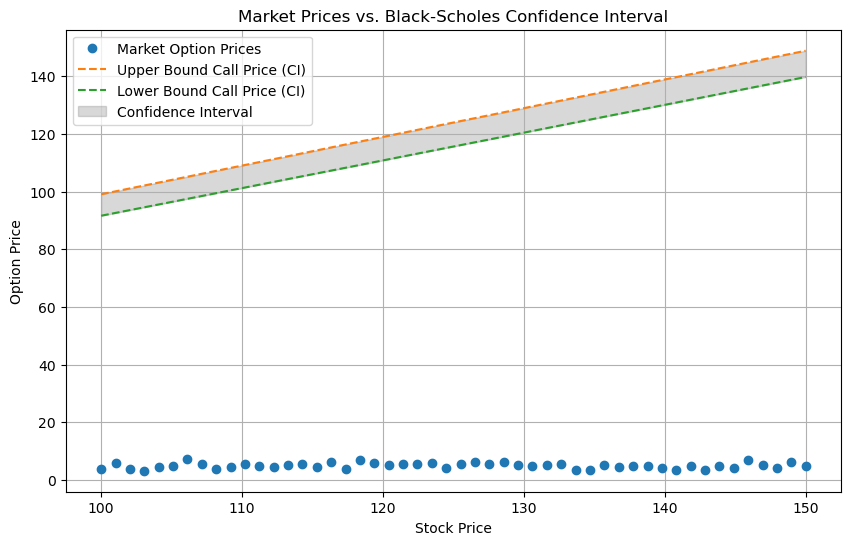

In [13]:
# Estimate the implied variance
implied_vol = np.sqrt(sample_variance) / 100

# Calculate confidence intervals for implied variance
lower_bound, upper_bound = confidence_interval_variance(sample_variance, N)

# Calculate the Black-Scholes price for the upper and lower variance bounds
call_price_upper = black_scholes_call(stock_prices, strike_price, time_to_expiration, risk_free_rate, np.sqrt(upper_bound))
call_price_lower = black_scholes_call(stock_prices, strike_price, time_to_expiration, risk_free_rate, np.sqrt(lower_bound))

# Empirical test: Plot market option prices and Black-Scholes confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, option_prices, label="Market Option Prices", marker='o', linestyle='None')
plt.plot(stock_prices, call_price_upper, label="Upper Bound Call Price (CI)", linestyle='--')
plt.plot(stock_prices, call_price_lower, label="Lower Bound Call Price (CI)", linestyle='--')
plt.fill_between(stock_prices, call_price_lower, call_price_upper, color='gray', alpha=0.3, label="Confidence Interval")
plt.xlabel("Stock Price")
plt.ylabel("Option Price")
plt.title("Market Prices vs. Black-Scholes Confidence Interval")
plt.legend()
plt.grid(True)
plt.show()

## 6. Results and Analysis

Explanation: This section discusses whether the Black-Scholes model correctly forecasts the option prices within the confidence intervals and interprets the results.
Important analysis points What percentage of market prices as observed are inside the confidence interval? Does the stock's volatility or time to maturity follow any patterns that might compromise the model's accuracy? Are the findings in line with earlier studies that claim the Black-Scholes model overestimates or underestimates particular kinds of options?

Steps: Summarize the results of the empirical test.
Highlight any biases or systematic errors observed.
Propose potential reasons for deviations from the model (e.g., non-constant volatility, market inefficiencies).

## 7. Conclusion

Synopsis of Results: Summarize the Black-Scholes model's results using the confidence interval method. Talk about the results' ramifications for financial academics and option traders.

Future Work: Investigate the impact of other factors such as dividends, early exercise for American options, and stochastic volatility models. Test the model on different option types (e.g., puts, American options) and across various time periods or market conditions.
